# Deep Dive: Analyzing Connectivity
This tutorial will guide you through the process of querying and analyzing connectivity data using the CRANTpy package. We will cover how to retrieve connectivity data, filter it, and visualize the results.

In [61]:
# Import CRANTpy and other necessary libraries
import crantpy as cp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import navis 

# Set up logging to see progress
cp.set_logging_level("WARNING")
navis.set_loggers('WARNING')

print("CRANTpy loaded successfully!")
print(f"Default dataset: {cp.CRANT_DEFAULT_DATASET}")

CRANTpy loaded successfully!
Default dataset: latest


## 1. Authentication Setup

Before we can access the data, we need to authenticate with the CAVE service. This is typically a one-time setup.

In [2]:
# Generate and save authentication token (uncomment if first time)
# cp.generate_cave_token(save=True)

# Test connection
try:
    client = cp.get_cave_client()
    print(f"Successfully connected to datastack: {client.datastack_name}")
    print(f"Server: {client.server_address}")
except Exception as e:
    print(f"Connection failed: {e}")
    print("Please run: cp.generate_cave_token(save=True)")

Successfully connected to datastack: kronauer_ant
Server: https://proofreading.zetta.ai


## 2. Getting Sample Neurons

Let's query some neurons for our morphology analysis.

In [3]:
# Get a sample of olfactory projection neurons
opn_criteria = cp.NeuronCriteria(cell_class='olfactory_projection_neuron')
opn_ids = opn_criteria.get_roots()
print(f"Found {len(opn_ids)} olfactory projection neurons")

# Select a few for detailed analysis
sample_ids = opn_ids[:5]
print(f"\nSample neurons for detailed analysis:")
for i, neuron_id in enumerate(sample_ids, 1):
    print(f"  {i}. {neuron_id}")

Found 107 olfactory projection neurons

Sample neurons for detailed analysis:
  1. 576460752700282748
  2. 576460752681552812
  3. 576460752722405178
  4. 576460752773799604
  5. 576460752656800770


## 3. Retrieve Synapses

Here we use the `get_synapses()` function. 
- `pre_ids=sample_ids` filters for synapses downstream of our olfacotry projection neurons 
- `threshold=3` only preserves connections between neurons with at least 3 synapses 
- `materialization='latest'` uses the most recent version of the synapse table 
- `min_size=10` thresholds on the synapse size 
- `return_pixels=True` ensures that the coordinates in the table are in pixels, not nanometers 

In [34]:
synapses = cp.get_synapses(pre_ids=sample_ids, threshold=3, materialization='latest', min_size=10, return_pixels=True).sort_values(by=['size'], ascending=False)
synapses

,pre_pt_root_id,post_pt_root_id,id,created,superceded_id,valid,size,pre_pt_supervoxel_id,post_pt_supervoxel_id,pre_pt_position,post_pt_position,ctr_pt_position
327,576460752656800770,576460752757218115,67466116,2025-03-27 13:34:35.700037+00:00,NaN,t,808,74028400649714461,74028400649714467,"[30744, 10128, 2889]","[30730, 10148, 2889]","[30711, 10147, 2890]"
4326,576460752656800770,576460752695334471,70268442,2025-03-27 13:34:35.700037+00:00,NaN,t,434,74028469302369266,74028469302366875,"[31248, 10572, 2751]","[31248, 10600, 2750]","[31245, 10595, 2746]"
5047,576460752656800770,576460752473502047,70268423,2025-03-27 13:34:35.700037+00:00,NaN,t,412,74028469302315035,74028469302317479,"[31244, 10562, 2730]","[31222, 10550, 2730]","[31238, 10540, 2731]"
4431,576460752656800770,576460752711377299,88885894,2025-03-27 13:34:35.700037+00:00,NaN,t,410,74450819407932351,74450819407981036,"[36910, 12686, 3581]","[36900, 12706, 3582]","[36905, 12701, 3584]"
5752,576460752656800770,576460752726687375,82352741,2025-03-27 13:34:35.700037+00:00,NaN,t,394,74309944345762319,74309944345756838,"[34928, 10242, 2838]","[34912, 10248, 2836]","[34914, 10229, 2837]"
...,...,...,...,...,...,...,...,...,...,...,...,...
5954,576460752656800770,576460752656800770,100354228,2025-03-27 13:34:35.700037+00:00,NaN,t,10,74873375134779283,74873375134779283,"[43518, 17728, 2287]","[43518, 17728, 2287]","[43532, 17732, 2286]"
6120,576460752722405178,576460752683701993,66881054,2025-03-27 13:34:35.700037+00:00,NaN,t,10,73889243441050078,73889243441057954,"[29572, 33548, 1925]","[29560, 33556, 1928]","[29562, 33552, 1927]"
3280,576460752773799604,576460752773799604,97769404,2025-03-27 13:34:35.700037+00:00,NaN,t,10,74732500408408998,74732500408408998,"[41394, 15702, 2913]","[41394, 15702, 2913]","[41410, 15694, 2913]"
1852,576460752656800770,576460752747290961,81809108,2025-03-27 13:34:35.700037+00:00,NaN,t,10,74240605722945263,74240605722927368,"[34128, 25724, 391]","[34140, 25716, 386]","[34136, 25722, 388]"


Let's plot the raw EM data centered at the three largest synapses to see whether we find synaptic vesicles. 

Decompressing: 100%|██████████| 9/9 [00:00<00:00, 1639.97it/s]


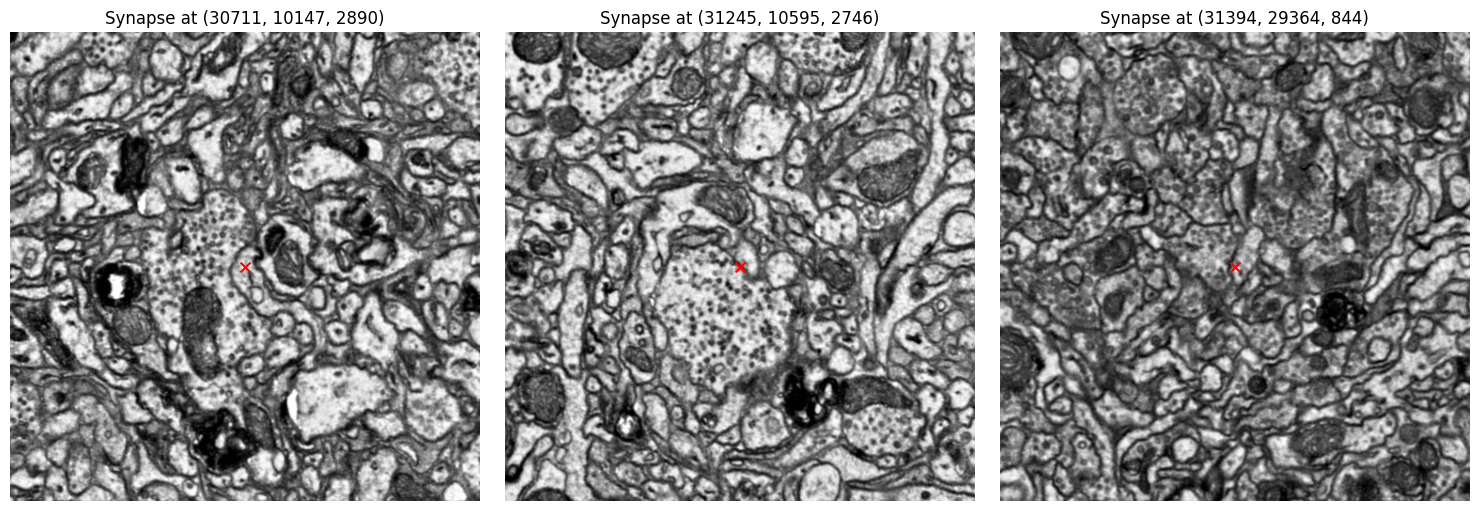

In [33]:
# Plot EM image around the detected synapses
image_size = 500
top_synapse_coords = synapses[['ctr_pt_position']].head(3).values.tolist()
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, coords in zip(axes, top_synapse_coords):
    x_center, y_center, z_center = coords[0]
    img = cp.plot_em_image(x_center, y_center, z_center, size=image_size)
    ax.scatter(image_size//2, image_size//2, marker='x', color='red', s=50)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Synapse at ({x_center}, {y_center}, {z_center})")
    ax.axis('off')
plt.tight_layout()
plt.show()

Now let's inspect the partners of these neurons 

Fetching meshes:   0%|          | 0/2 [00:00<?, ?it/s]

Fetching meshes:   0%|          | 0/2 [00:00<?, ?it/s]

Fetching meshes:   0%|          | 0/2 [00:00<?, ?it/s]

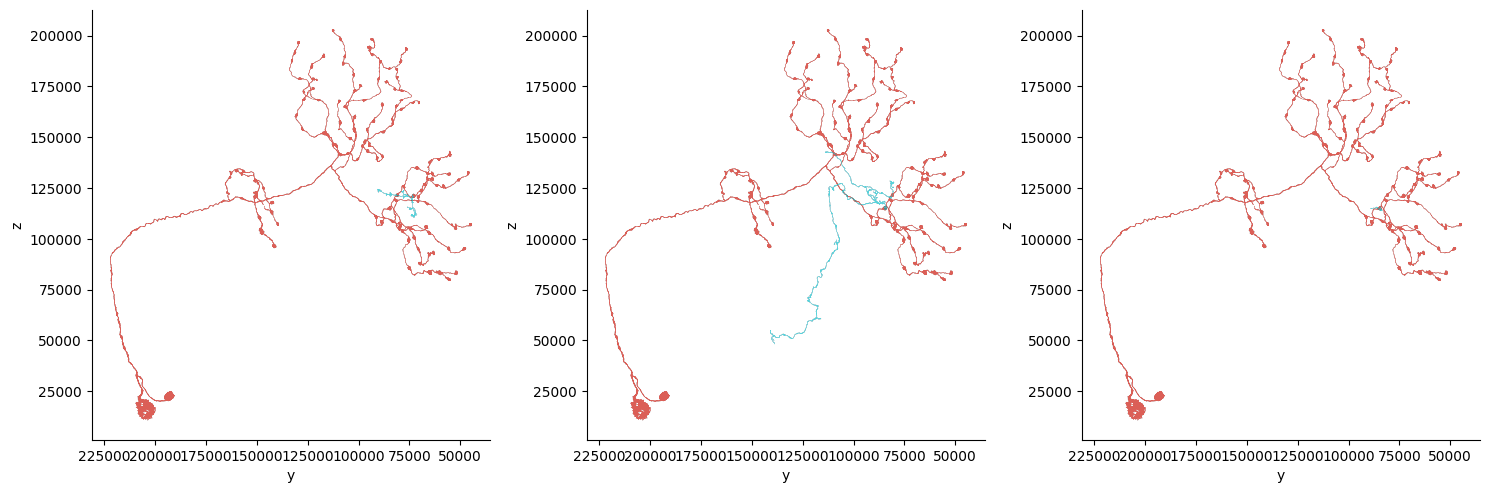

In [39]:
pre_post_pairs = synapses[['pre_pt_root_id', 'post_pt_root_id']].head(3).values.tolist()
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, pairs in zip(axes, pre_post_pairs):
    pre_id, post_id = pairs
    meshes = cp.get_mesh_neuron([pre_id, post_id])
    navis.plot2d(meshes, ax=ax, view=("-y", "z"))
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

## 4. Get Adjacency 

Instead of getting the full synapse table, we can instead get an adjacency matrix of synaptic connections between neurons using the `get_adjacency` function: 

- `post_ids=sample_ids` exclusively looks for inputs to the neurons 

In [53]:
adjacency = cp.get_adjacency(post_ids=sample_ids, threshold=5)
print(f"Adjacency matrix shape: {adjacency.shape}")
print(f"Identified {adjacency.shape[0]} input neurons connected to our {adjacency.shape[1]} sample PNs.")

Adjacency matrix shape: (49, 5)
Identified 49 input neurons connected to our 5 sample PNs.


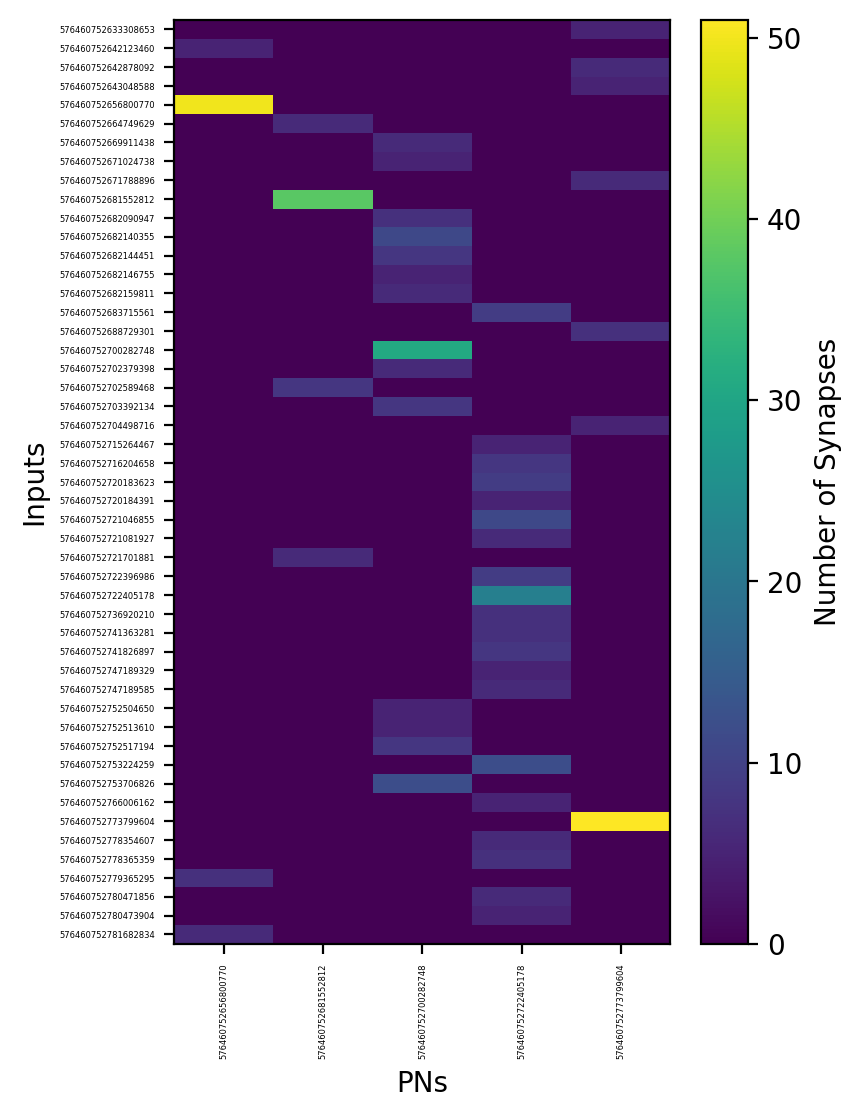

In [59]:
# Heatmap 
plt.figure(figsize=(4, 6), dpi=200)
plt.imshow(adjacency.values, aspect='auto', cmap='viridis')
plt.colorbar(label='Number of Synapses')
plt.xlabel('PNs')
plt.ylabel('Inputs')
plt.xticks(ticks=np.arange(len(adjacency.columns)), labels=adjacency.columns, rotation=90, fontsize=3)
plt.yticks(ticks=np.arange(len(adjacency.index)), labels=adjacency.index, fontsize=3)
plt.show()

Let's now plot the meshes for all of the neurons that provide input to one of these PNs. We will use the PN with the most synaptic inputs for demonstration purposes. 

Fetching meshes:   0%|          | 0/21 [00:00<?, ?it/s]

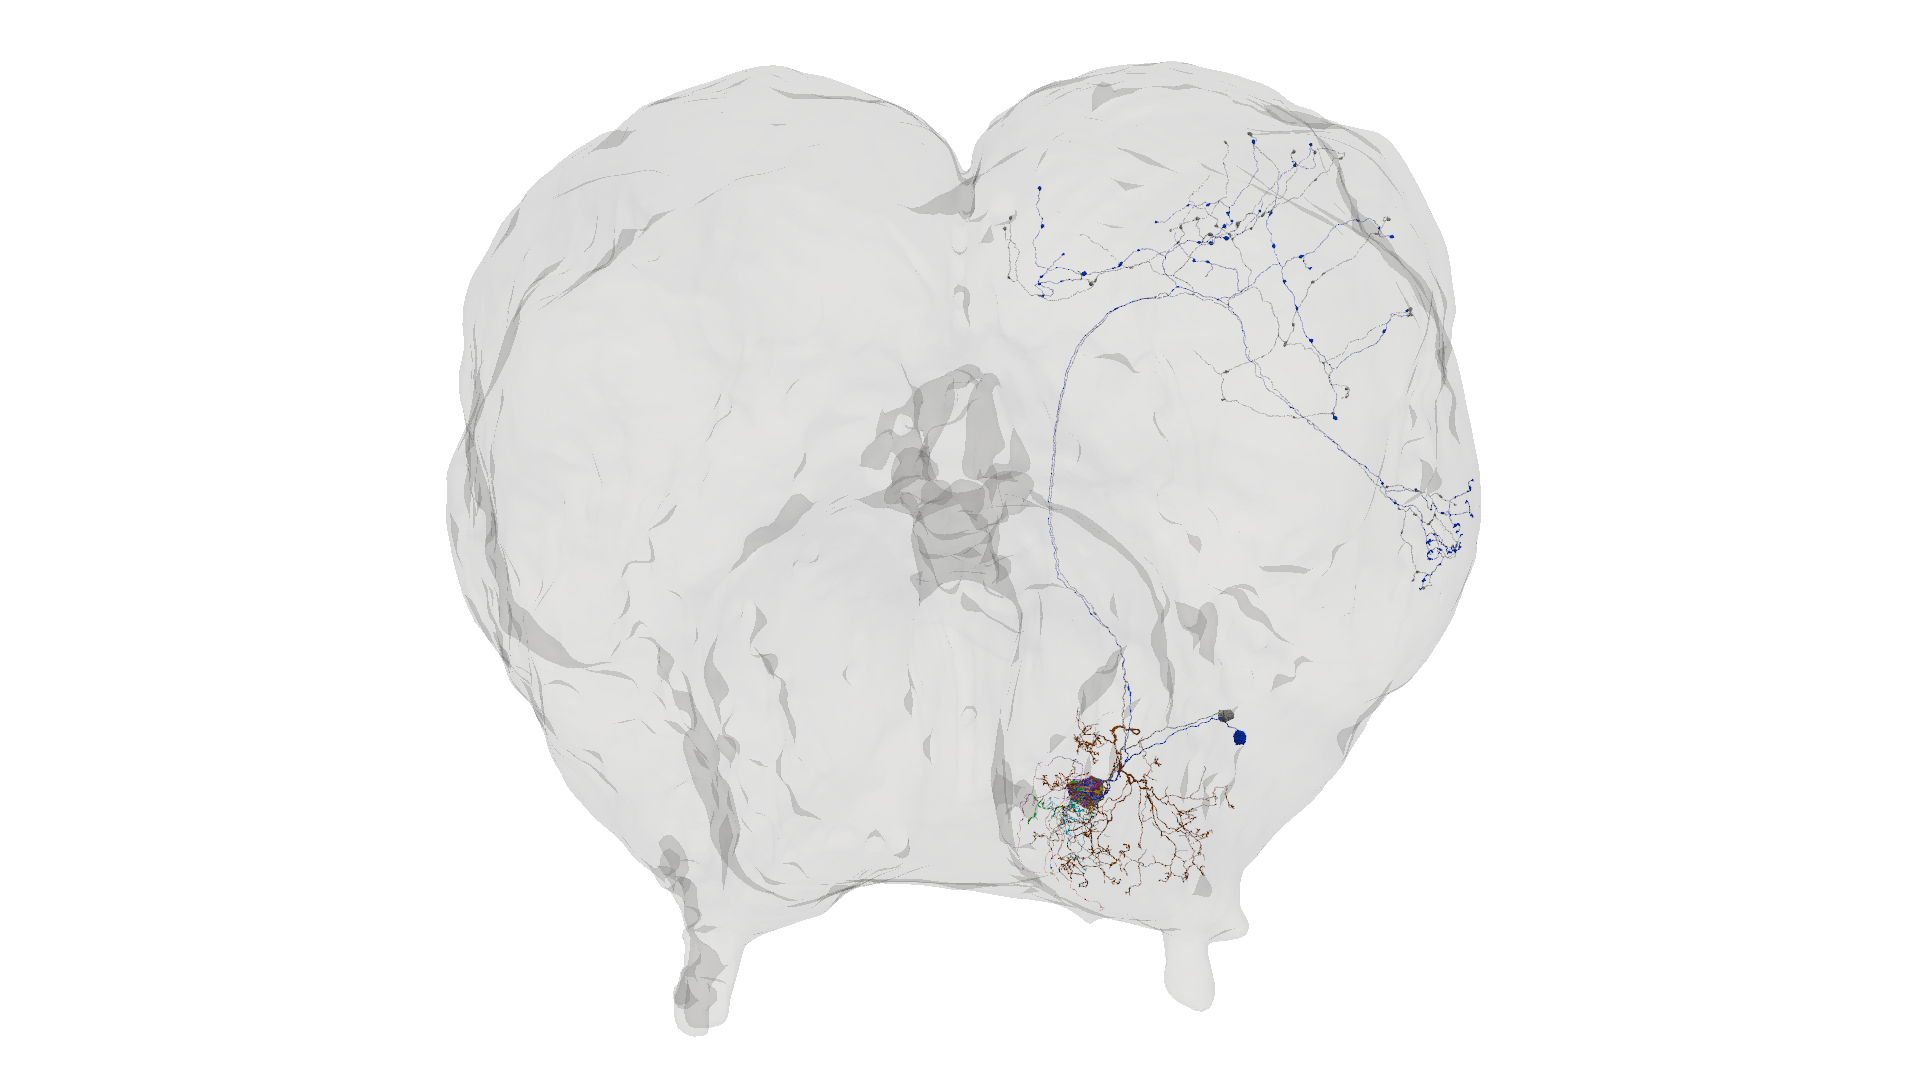

In [86]:
# Get the ID of the PN with the most inputs 
target_pn_id = int(adjacency.sum(axis=0).idxmax())
# Get all inputs to this PN
input_neuron_ids = adjacency.index[adjacency[target_pn_id] > 0].tolist()
# Combine target PN ID with its inputs
combined_ids = input_neuron_ids + [target_pn_id]
# Plot the brain mesh scene
plotter = cp.get_brain_mesh_scene(combined_ids, backend='static') 
plotter.window_size = (1920, 1080)
plotter.zoom_camera(1.5)
plotter.show()

In [88]:
adjacency = cp.get_adjacency(post_ids=sample_ids, threshold=5, symmetric=True)
print(f"Symmetric Adjacency matrix shape: {adjacency.shape}")

Symmetric Adjacency matrix shape: (5, 5)
